In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1)

In [2]:
dataset = pd.read_csv('QuizData.csv')
dataset[:5]

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [3]:
total = dataset.iloc[:, :-1].values # QnA: '열' 부분에서 왜 0을 쓰지 않고 굳이 슬라이스해서 이차원리스트가 나오게 하는 걸까?
reception = dataset.iloc[:, -1].values

total[:5], reception[:5]

(array([[118],
        [253],
        [320],
        [ 94],
        [155]], dtype=int64),
 array([ 62, 148, 201,  80,  92], dtype=int64))

# 2)

In [4]:
import sklearn # 따로 안 해도 됨
from sklearn.model_selection import train_test_split

In [5]:
total_train, total_test, reception_train, reception_test = train_test_split(total, reception, test_size=0.25, random_state=0)
total_train.size, total_test.size, reception_train.size, reception_test.size

(15, 5, 15, 5)

# 3)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(total_train, reception_train)

LinearRegression()

# 4)

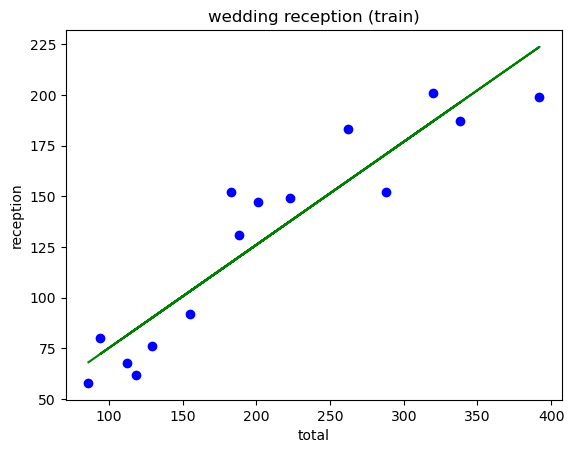

In [9]:
plt.scatter(total_train, reception_train, c='b')
plt.plot(total_train, reg.predict(total_train), c='g')
plt.title('wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

# 5)

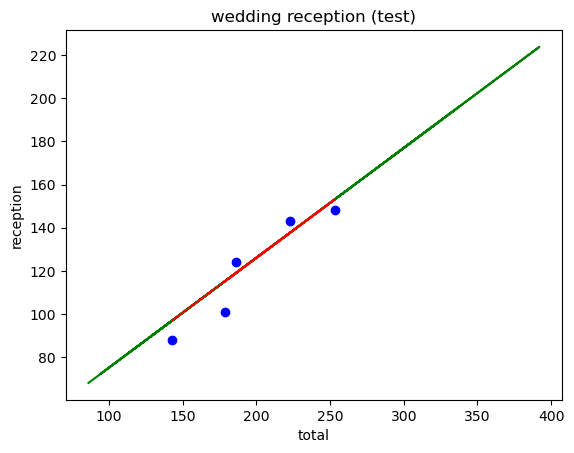

In [25]:
plt.scatter(total_test, reception_test, c='b')
plt.plot(total_train, reg.predict(total_train), c='g') # 우리가 훈련시킨 모델에 total의 훈련데이터를 넣은 선
plt.plot(total_test, reg.predict(total_test), c='r') # 우리가 훈련시킨 모델에 totoal의 테스트데이터를 넣은 선
plt.title('wedding reception (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

# 6)

In [12]:
reg.score(total_train, reception_train)

0.8707088403321211

In [26]:
reg.score(total_test, reception_test)

0.8634953212566615

# 7)

In [34]:
'%.0f' % reg.predict([[300]])

'177'

In [38]:
total = 300
reception_pred = reg.predict([[total]])

print(f'결혼식 참석 인원 {total}명에 대한 예상 식수 인원은 {np.around(reception_pred[0]).astype(int)}명입니다.')

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177명입니다.
